<a href="https://colab.research.google.com/github/tc11echo/data-structure-and-algorithm-in-python/blob/main/data_structure/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tree

|Data Structures (SEHH2239)|Discrete Structures (SEHH2241)|
|:---:|:---:|
|Use 1 as first level|Use 0 as first level|
|Height of empty tree is 0||
|Height=Depth=Highest Level Number|Height=Depth=Highest Level Number|

In all my tree I will use 0 as first level

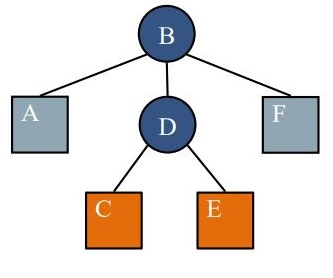

Above tree:

||Data Structures (SEHH2239)|Discrete Structures (SEHH2241)|
|:---|:---:|:---:|
|Root|B|B|
|Leaves|A,C,E,F|A,C,E,F|
|Siblings|(A,D,F),(C,E)|(A,D,F),(C,E)|
|Height|3|2|
|Depth|3|2|
|Tree Degree|3|3|

In [11]:
# Normal Tree
class Tree:
  def __init__(self, data):
    self.children=[]
    self.data=data

left=Tree("A")
middle=Tree("D")
right=Tree("F")
root=Tree("B")
root.children=[left, middle, right]
grandchildC=Tree("C")
grandchildE=Tree("E")
middle.children=[grandchildC, grandchildE]

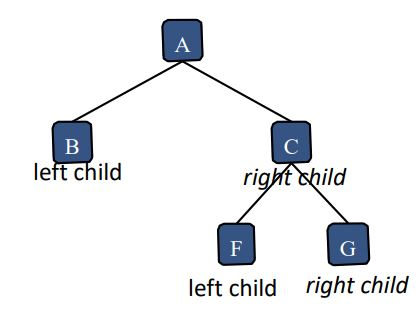

In [12]:
# Binary Tree
class BinaryTreeNode:
  def __init__(self, data):
    self.data=data
    self.left=self.right=None

  def set_left_child(self,left_child):
    self.left=left_child

  def set_right_child(self,right_child):
    self.right=right_child

# Create Binary Tree
a=BinaryTreeNode("A")
b=BinaryTreeNode("B")
c=BinaryTreeNode("C")
a.set_left_child(b)
a.set_right_child(c)
f=BinaryTreeNode("F")
g=BinaryTreeNode("G")
c.set_left_child(f)
c.set_right_child(g)

In [13]:
class Node:
  def __init__(self, data):
    self.data=data
    self.left=self.right=None

root=Node(8)
root.left=Node(5)
root.right=Node(4)
root.left.left=Node(9)
root.left.right=Node(7)
root.left.right.left=Node(1)
root.left.right.right=Node(12)
root.left.right.right.left=Node(2)
root.right.right=Node(11)
root.right.right.left=Node(3)

In [14]:
def print_tree(root, lev):
  if root is None:
    return
  print_tree(root.right,lev+1)
  print("   "*lev+str(root.data))
  print_tree(root.left,lev+1)

print("print tree:")
print_tree(root, 0)
print()

# preorder
def traverse_preorder(root):
  if root is not None:
    print(root.data,end=" -> ")
    traverse_preorder(root.left)
    traverse_preorder(root.right)

print("Preorder traversal:")
traverse_preorder(root)
print()

# inorder
def traverse_inorder(root):
  if root is not None:
    traverse_inorder(root.left)
    print(root.data,end=" -> ")
    traverse_inorder(root.right)

print("Inorder traversal:")
traverse_inorder(root)
print()

# postorder
def traverse_postorder(root):
  if root is not None:
    traverse_postorder(root.left)
    traverse_postorder(root.right)
    print(root.data,end=" -> ")

print("Postorder traversal:")
traverse_postorder(root)
print()

# level order
import queue
# Function to print level order traversal of tree
def traverse_level_order(root):
  q=queue.Queue()
  q.put(root) #enqueue
  while not q.empty():
    t=q.get() #dequeue
    if t.left is not None:
      q.put(t.left)  #enqueue
    if t.right is not None:
      q.put(t.right)  #enqueue
    print(t.data,end=" -> ")

print("Level order traversal:")
traverse_level_order(root)
print()

"""#for using the data structure wrote before
def traverse_level_order(root):
  q=LinkedQueue()
  q.enqueue(root)
  while not q.empty():
    t=q.dequeue()
    if t.left is not None:
      q.enqueue(t.left)
    if t.right is not None:
      q.enqueue(t.right)
    print(t.data,end=" -> ")"""

print tree:
      11
         3
   4
8
         12
            2
      7
         1
   5
      9

Preorder traversal:
8 -> 5 -> 9 -> 7 -> 1 -> 12 -> 2 -> 4 -> 11 -> 3 -> 
Inorder traversal:
9 -> 5 -> 1 -> 7 -> 2 -> 12 -> 8 -> 4 -> 3 -> 11 -> 
Postorder traversal:
9 -> 1 -> 2 -> 12 -> 7 -> 5 -> 3 -> 11 -> 4 -> 8 -> 
Level order traversal:
8 -> 5 -> 4 -> 9 -> 7 -> 11 -> 1 -> 12 -> 3 -> 2 -> 


'#for using the data structure wrote before\ndef traverse_level_order(root):\n  q=LinkedQueue()\n  q.enqueue(root)\n  while not q.empty():\n    t=q.dequeue()\n    if t.left is not None:\n      q.enqueue(t.left)\n    if t.right is not None:\n      q.enqueue(t.right)\n    print(t.data,end=" -> ")'

In [15]:
def search_all_path(root, path, path_list):
  if root is not None:
    path.append(root.data)
    #if end node
    if root.left is None and root.right is None:
      #path.append(sum(path[1:-1]))
      path_list.append(path.copy())
      #path.pop()
    search_all_path(root.left, path, path_list)
    search_all_path(root.right, path, path_list)
    path.pop()

print("search all path:")
temp=[]
search_all_path(root,[],temp)
#temp=sorted(temp, key=lambda s:s[-1])
for i in temp:
  #print(len(temp[i])-1)
  for j in range(0,len(i)):
    print(i[j], end=" -> ")
  print()
print()


def search_path_by_weight(root, path):
  if root is not None:
    path.append(root.data)
    #if has both left and right node
    if root.left is not None and root.right is not None:
      if root.left.data<=root.right.data:
        search_path_by_weight(root.left, path)
      elif root.left.data>root.right.data:
        search_path_by_weight(root.right, path)
    #if only has left node
    elif root.left is not None:
      search_path_by_weight(root.left, path)
    #if only has right node
    elif root.right is not None:
      search_path_by_weight(root.right, path)

print("search path by weight (greedy algorithm):")
temp=[]
search_path_by_weight(root,temp)
for i in range(0,len(temp)):
  print(temp[i], end=" -> ")
print()

search all path:
8 -> 5 -> 9 -> 
8 -> 5 -> 7 -> 1 -> 
8 -> 5 -> 7 -> 12 -> 2 -> 
8 -> 4 -> 11 -> 3 -> 

search path by weight (greedy algorithm):
8 -> 4 -> 11 -> 3 -> 


#Binary Search Tree
### Definition

* binary tree
* For every node x,
  * all keys in the left subtree of x are smaller than the key in x
  * all keys in the right subtree of x are greater than the key in x
* No duplicate nodes(in this course, real-life can have)

*For solving inbalance binary search tree, we can use, AVL tree, Red–black tree, scapegoat tree, Splay Tree, Treap

---

### insert

* Nodes are insert to the tree according to the key
* follow the definition

---

### Remove

Three cases:
* Element is in a leaf
* Element is in a degree 1 node
* Element is in a degree 2 node

  * Replace with **predecessor** which is the largest node in the left subtree

  * Replace with **successor** which is the smallest node in the right subtree (use in this note)


In [16]:
# Binary Search Tree (OOP)
class BinarySearchTreeNode:
  def __init__(self, data):
    self.left=self.right=None
    self.data=data

class BinarySearchTree:
  def __init__(self):
    self.root=None
  
  def empty(self):
    return self.root is None

  def search(self, criteria):
    cur=self.root
    while cur is not None:
      if criteria==cur.data:
        print("found")
        return
      elif criteria<cur.data:
        cur=cur.left
      elif criteria>cur.data:
        cur=cur.right
    # no matching key
    print("not find")

  def insert(self, data, cur=None):
    new=BinarySearchTreeNode(data)
    if self.empty():
      self.root=new
    else:
      if cur is None:
        cur=self.root
      if new.data<cur.data:
        if cur.left is None:
          cur.left=new
        else:
          self.insert(data, cur.left)
      else:
        if cur.right is None:
          cur.right=new
        else:
          self.insert(data, cur.right)

  """def insert(self, data):
    if self.empty():
      self.root=BinarySearchTreeNode(data)
    else:
      self.insert_node(self.root, BinarySearchTreeNode(data))

  def insert_node(self, cur, new):
    if new.data<cur.data:
      if cur.left is None:
        cur.left=new
      else:
        self.insert_node(cur.left, new)
    else:
      if cur.right is None:
        cur.right=new
      else:
        self.insert_node(cur.right, new)"""

  def find_predecessor(self, cur):
    s=cur.left
    ps=cur # parent of s
    while s.right!=None:
    # move to larger element
      ps=s
      s=s.right
    return s.data, s, ps

  def remove(self, target):
    # set cur to point to node with key target
    cur=self.root
    while cur!=None and cur.data!=target:
    # move to a child of cur
      cur_parent=cur
      if target<cur.data:
        cur=cur.left
      else:
        cur=cur.right
    if cur==None: # no element with key target
      return None

    # restructure tree
    # case: cur has 2 children
    if cur.left!=None and cur.right!=None:
    # two children
      # convert to zero or one child case
      # find element with largest key in left subtree of cur
      cur.data, cur, cur_parent=self.find_predecessor(cur)

    # case: cur has at most one child, save this child in cur_child
    if cur.left==None:
      cur_child=cur.right
    else:
      cur_child=cur.left

    # remove node cur
    if cur==self.root:
      self.root=cur_child
    else:
    # is cur left or right child of cur_parent?
      if cur==cur_parent.left:
        cur_parent.left=cur_child
      else:
        cur_parent.right=cur_child

bst=BinarySearchTree()
bst.insert(36)
bst.insert(19)
bst.insert(7)
bst.insert(8)
bst.insert(5)
bst.insert(9)

traverse_inorder(bst.root)
print()
bst.search(1333)
bst.remove(7)
traverse_inorder(bst.root)

5 -> 7 -> 8 -> 9 -> 19 -> 36 -> 
not find
5 -> 8 -> 9 -> 19 -> 36 -> 

In [17]:
# Binary Search Tree (Data Structure)
class BinarySearchTreeNode:
  def __init__(self, key, data):
    self.left=self.right=None
    self.key=key
    self.data=data

def search(root, criteria):
  cur=root
  while cur is not None:
    if criteria==cur.key:
      print("found")
      return
    elif criteria<cur.key:
      cur=cur.left
    elif criteria>cur.key:
      cur=cur.right
  # no matching key
  print("not find")

def insert(root, key, data):
  if root is None:
    return BinarySearchTreeNode(key, data)
  # Compare the new value with the parent node
  if key<root.key:
    root.left=insert(root.left, key, data)
  elif key>root.key:
    root.right=insert(root.right, key, data)
  return root

'''def insert(root, key, data):
  if root is None:
    return BinarySearchTreeNode(key, data)
  # Compare the new value with the parent node
  if key<root.key:
    if root.left is None:
      root.left=BinarySearchTreeNode(key, data)
    else:
      insert(root.left, key, data)
  elif key>root.key:
    if root.right is None:
      root.right=BinarySearchTreeNode(key, data)
    else:
      insert(root.right, key, data)'''

# To find the inorder successor which is the smallest node in the subtree
def find_successor(root):
  cur=root
  while cur.left!=None:
    cur=cur.left
  return cur

def remove(root, key):
  if root is None:
    return
  # If the key to be deleted is smaller than the root's key then it lies in left subtree
  if key<root.key:
    root.left=remove(root.left, key)
  # If the key to be delete is greater than the root's key then it lies in right subtree
  elif key>root.key:
    root.right=remove(root.right, key)
  # If key is same as root's key, then this is the node to be deleted
  else:
    # Node with only one child or no child
    if root.left is None:
      temp=root.right
      root=None
      return temp
    elif root.right is None:
      temp=root.left
      root=None
      return temp
    # Node with two children: Get the inorder successor(smallest in the right subtree)
    temp=find_successor(root.right)
    # Copy the inorder successor's content to this node
    root.key=temp.key
    root.data=temp.data
    # Delete the inorder successor
    root.right=remove(root.right, temp.key)
  return root

bst=None
bst=insert(bst,20,20)
#bst=BinarySearchTreeNode(20,20)
bst=insert(bst,36,36)
bst=insert(bst,19,19)
bst=insert(bst,7,7)
bst=insert(bst,8,8)
bst=insert(bst,9,9)
bst=insert(bst,5,5)
bst=insert(bst,22,22)

traverse_preorder(bst)
print()
search(bst,999)
remove(bst,20)
traverse_preorder(bst)
print()

20 -> 19 -> 7 -> 5 -> 8 -> 9 -> 36 -> 22 -> 
not find
22 -> 19 -> 7 -> 5 -> 8 -> 9 -> 36 -> 


# AVL Tree

Balance factor = Height of right subtree - Height of left subtree

In [18]:
# AVL Tree (Data Structure)
class AVLTreeNode():
  def __init__(self, key, data):
    self.left=self.right=None
    self.key=key
    self.data=data
    self.height=0

def get_height(root):
  if root is None:
    return -1
  return root.height

def get_balance(root):
  if root is None:
    return 0
  return get_height(root.left)-get_height(root.right)

def get_min_value_node(root):
  if root is None or root.left is None:
    return root

def left_rotate(z): # for RR
  y=z.right
  T2=y.left
  # Perform rotation
  y.left=z
  z.right=T2
  # Update heights
  z.height=max(get_height(z.left),get_height(z.right))+1
  y.height=max(get_height(y.left),get_height(y.right))+1
  # Return the new root
  return y

def right_rotate(z): # for LL
  y=z.left
  T3=y.right
  # Perform rotation
  y.right=z
  z.left=T3
  # Update heights
  z.height=max(get_height(z.left),get_height(z.right))+1
  y.height=max(get_height(y.left),get_height(y.right))+1
  # Return the new root
  return y

def insert(root, key, data):
  if root is None:
    return AVLTreeNode(key, data)
  # Compare the new value with the parent node
  if key<root.key:
    root.left=insert(root.left, key, data)
  elif key>root.key:
    root.right=insert(root.right, key, data)
  # Update the height of the ancestor node
  root.height=max(get_height(root.left),get_height(root.right))+1
  # Get the balance factor
  balance=get_balance(root)
  # If the node is unbalanced, then try out the 4 cases
  if balance > 1 and key < root.left.key: # Left Left
    return right_rotate(root)
  if balance < -1 and key > root.right.key: # Right Right
    return left_rotate(root)
  if balance > 1 and key > root.left.key: # Left Right
    root.left=left_rotate(root.left)
    return right_rotate(root)
  if balance < -1 and key < root.right.key: # Right Left
    root.right=right_rotate(root.right)
    return left_rotate(root)
  return root

def insert_by_array(root, arr):
  for i in arr:
    root=insert(root, i[0], i[1])
  return root

def remove(root, key):
  # Step 1 - Perform standard BST remove
  if not root:
    return root
  elif key < root.key:
    root.left=remove(root.left, key)
  elif key > root.key:
    root.right=remove(root.right, key)
  else:
    if root.left is None:
      temp=root.right
      root=None
      return temp
    elif root.right is None:
      temp=root.left
      root=None
      return temp
    temp=get_min_value_node(root.right)
    root.data=temp.data
    root.right=remove(root.right,temp.data)
  # If the tree has only one node, simply return it
  if root is None:
    return root
  # Step 2 - Update the height of the ancestor node
  root.height=max(get_height(root.left),get_height(root.right))+1
  # Step 3 - Get the balance factor
  balance=get_balance(root)
  # Step 4 - If the node is unbalanced, then try out the 4 cases
  if balance > 1 and get_balance(root.left) >= 0: # Left Left
      return right_rotate(root)
  if balance < -1 and get_balance(root.right) <= 0: # Right Right
      return left_rotate(root)
  if balance > 1 and get_balance(root.left) < 0: # Left Right
      root.left=left_rotate(root.left)
      return right_rotate(root)
  if balance < -1 and get_balance(root.right) > 0: # Right Left
      root.right=right_rotate(root.right)
      return left_rotate(root)
  return root

#avlt=AVLTreeNode(5, 5)
avlt=None
'''avlt=insert(avlt, 68, 68)
avlt=insert(avlt, 7, 7)
avlt=insert(avlt, 23, 23)
avlt=insert(avlt, 45, 45)
avlt=insert(avlt, 3, 3)
avlt=insert(avlt, 12, 12)
avlt=insert(avlt, 52, 52)'''
avlt=insert_by_array(avlt, [(68,68),(7,7),(23,23),(45,45),(3,3),(12,12),(52,52)])
#root=insert_by_array(root, [(13,"A"), (33,"B"), (9,"C"), (8,"D"), (11,"E"), (21,"F"), (53,"G"), (61,"H")])

#root=remove(root, 6)
print("Preorder traversal:")
traverse_preorder(avlt)
print()
print("Inorder traversal:")
traverse_inorder(avlt)
print()

Preorder traversal:
23 -> 7 -> 3 -> 12 -> 52 -> 45 -> 68 -> 
Inorder traversal:
3 -> 7 -> 12 -> 23 -> 45 -> 52 -> 68 -> 
